# Домашнє завдання: Прогнозування орендної плати за житло

## Мета завдання
Застосувати знання з лекції для побудови моделі лінійної регресії, що прогнозує орендну плату за житло в Індії. Ви пройдете весь цикл вирішення задачі машинного навчання: від дослідницького аналізу до оцінки якості моделі.

## Опис датасету
**House Rent Prediction Dataset** містить інформацію про 4700+ оголошень про оренду житла в Індії з такими параметрами:
- **BHK**: Кількість спалень, залів, кухонь
- **Rent**: Орендна плата (цільова змінна)
- **Size**: Площа в квадратних футах
- **Floor**: Поверх та загальна кількість поверхів
- **Area Type**: Тип розрахунку площі
- **Area Locality**: Район
- **City**: Місто
- **Furnishing Status**: Стан меблювання
- **Tenant Preferred**: Тип орендаря
- **Bathroom**: Кількість ванних кімнат
- **Point of Contact**: Контактна особа

---

## Завдання 1: Завантаження та перший огляд даних (1 бал)

**Що потрібно зробити:**
1. Завантажте дані з файлу `House_Rent_Dataset.csv`
2. Виведіть розмір датасету
3. Покажіть перші 5 рядків
4. Виведіть загальну інформацію про дані (включно з типами даних та кількістю значень)


In [16]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Завантажуємо дані
df = pd.read_csv('House_Rent_Dataset.csv', sep=None, engine='python')

# Перше знайомство з даними
df.shape

(4746, 12)

In [6]:
df.head()

,Posted On,BHK,Rent,Size,Floor,Area Type,Area Locality,City,Furnishing Status,Tenant Preferred,Bathroom,Point of Contact
0,2022-05-18,2,10000,1100,Ground out of 2,Super Area,Bandel,Kolkata,Unfurnished,Bachelors/Family,2,Contact Owner
1,2022-05-13,2,20000,800,1 out of 3,Super Area,"Phool Bagan, Kankurgachi",Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
2,2022-05-16,2,17000,1000,1 out of 3,Super Area,Salt Lake City Sector 2,Kolkata,Semi-Furnished,Bachelors/Family,1,Contact Owner
3,2022-07-04,2,10000,800,1 out of 2,Super Area,Dumdum Park,Kolkata,Unfurnished,Bachelors/Family,1,Contact Owner
4,2022-05-09,2,7500,850,1 out of 2,Carpet Area,South Dum Dum,Kolkata,Unfurnished,Bachelors,1,Contact Owner


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4746 entries, 0 to 4745
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Posted On          4746 non-null   object
 1   BHK                4746 non-null   int64 
 2   Rent               4746 non-null   int64 
 3   Size               4746 non-null   int64 
 4   Floor              4746 non-null   object
 5   Area Type          4746 non-null   object
 6   Area Locality      4746 non-null   object
 7   City               4746 non-null   object
 8   Furnishing Status  4746 non-null   object
 9   Tenant Preferred   4746 non-null   object
 10  Bathroom           4746 non-null   int64 
 11  Point of Contact   4746 non-null   object
dtypes: int64(4), object(8)
memory usage: 445.1+ KB


## Завдання 2: Дослідницький аналіз даних (EDA) (4 бали)

**Що потрібно зробити:**
1. **Аналіз пропущених значень.** Перевірте наявність і відсоток пропущених значень у кожній колонці
2. **Базова статистика.** Обчисліть базову статистику (середнє, квартилі, стандартне відхилення) для числових змінних.
3. **Аналіз цільової змінної.** Побудуйте гістограму розподілу цільової змінної (Rent)
4. **Робота з викидами.** Знайдіть та видаліть викиди в цільовій змінній (якщо є). Визначити викиди можна будь-яким зрозумілим для вас способом, як варіант - таким, що використовується в побудові box-plot (https://en.wikipedia.org/wiki/Box_plot#Example_with_outliers).
5. **Аналіз категоріальних змінних.** Виведіть кількість унікальних значень для кожної з категоріальних колонок.


In [10]:
# 1. Аналіз пропущених значень. 
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100

print("Пропущені значення (кількість і %):")
print(pd.DataFrame({'Пропущені': missing, '%': missing_percent}))

Пропущені значення (кількість і %):
                   Пропущені    %
Posted On                  0  0.0
BHK                        0  0.0
Rent                       0  0.0
Size                       0  0.0
Floor                      0  0.0
Area Type                  0  0.0
Area Locality              0  0.0
City                       0  0.0
Furnishing Status          0  0.0
Tenant Preferred           0  0.0
Bathroom                   0  0.0
Point of Contact           0  0.0


In [13]:
# 2. Базова статистика для числових змінних
stats = df[['BHK', 'Rent', 'Size', 'Bathroom']].describe()
stats.round(2)

,BHK,Rent,Size,Bathroom
count,4746.00,4746.00,4746.00,4746.00
mean,2.08,34993.45,967.49,1.97
std,0.83,78106.41,634.20,0.88
min,1.00,1200.00,10.00,1.00
25%,2.00,10000.00,550.00,1.00
50%,2.00,16000.00,850.00,2.00
75%,3.00,33000.00,1200.00,2.00
max,6.00,3500000.00,8000.00,10.00


**Висновки з базової статистики:**

**BHK**: Кількість спалень, залів, кухонь.
У середньому квартри мають по 2 кімнати, mean = 2,08, медіана 2. 75% квартир - 3 кімнати. Максимум 6 кімнат, що зустрічається рідко і вказує на великі апартаменти.

**Rent**: Орендна плата. Середнє значення 35 тис. медіана значно нижча - 16 тис, отже, розподіл значно зміщений вправо (є дорогі об'єкти-викиди), максимальне значення - 3500000.00 - нереальне значення - викид.

**Size**: Площа в квадратних футах. Середнє значення - 967.49, медіана - 850.00. 75% квартир - мають площу до 1200.00	футів. Мінімум - 10 кв. футів  -помилка чи викид. Максимум - 8000.00 кв. футів - великі будинки, значно відрізняються від більшості. Найпоширеніша квартира - 550 - 1200 кв. футів.

**Bathroom**: Кількість ванних кімнат. В сеердньому 2 ванни. Максимум - 10 - що виглядає нереалістично, можливо викид.

Аналіз даних базової статистики дозволяє зробити висновок про те, що типова квартира має 2-3 кімнати, площа - 850-1200 кв.футів, 1-2 санвузли, орендна плата - 10-33 тис. 

Для подальшого аналізу варто очистити дані, видалити викиди, щоб не спотворити результати дослідження.

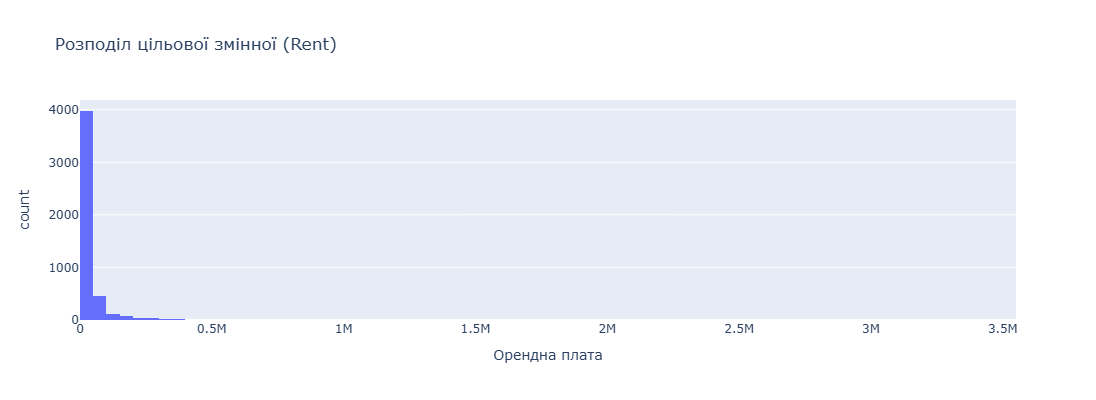

In [26]:
# Аналіз цільової змінної

# Фільтруємо дані без пропусків
df_clean = df[df['Rent'].notna()].copy()

# Розподіл орендної плати
fig = px.histogram(
    df_clean,
    x='Rent',
    nbins=100,
    title='Розподіл цільової змінної (Rent)',
    labels={'Rent': 'Орендна плата', 'count': 'Кількість'}
)
fig.update_layout(
    showlegend=False,
    height=400
)
fig.show()

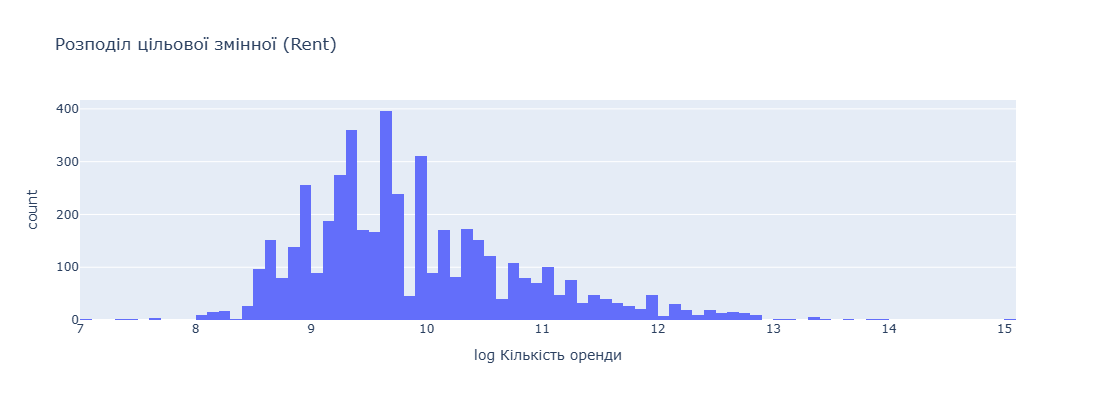

In [21]:
df_clean['log_target'] = np.log1p(df_clean['Rent'])
fig = px.histogram(
    df_clean,
    x='log_target',
    nbins=100,
    title='Розподіл цільової змінної (Rent)',
    labels={'log_target': 'log Кількість оренди', 'count': 'Кількість оренди'}
)
fig.update_layout(
    showlegend=False,
    height=400
)
fig.show()

**Висновки на основі розподілу цільової змінної Rent.**
Розподіл не є нормальним, він правосторонньо зміщений. Більшість значень оренди зосереджено в нижньому діапазоні. Логарифмічна шкала зробила розподіл більш симетричним, але все одно видно "довгий хвіст" праворуч.

На графіку є дані з дуже високою вартістю (логарифм > 12, оренда понад 160 тис.)

Межі для Rent: -24500.0 – 67500.0
Розмір датасету до видалення: 4746
Розмір датасету після видалення: 4226


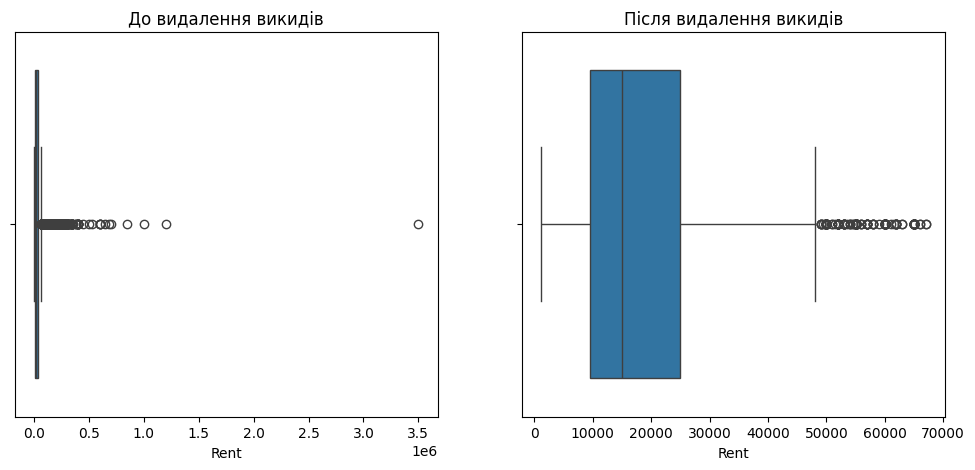

In [29]:
# 4. Робота з викидами.

# 4.1. Розрахунок квартилів і IQR
Q1 = df_clean['Rent'].quantile(0.25)
Q3 = df_clean['Rent'].quantile(0.75)
IQR = Q3 - Q1

# 4.2. Межі для викидів
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print("Межі для Rent:", lower_bound, "–", upper_bound)

# 4.3. Видаляємо викиди
df_no_outliers = df_clean[(df_clean['Rent'] >= lower_bound) & (df_clean['Rent'] <= upper_bound)]

print("Розмір датасету до видалення:", df_clean.shape[0])
print("Розмір датасету після видалення:", df_no_outliers.shape[0])

# 4.4. Візуалізація boxplot до і після
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.boxplot(x=df_clean['Rent'])
plt.title("До видалення викидів")

plt.subplot(1,2,2)
sns.boxplot(x=df_no_outliers['Rent'])
plt.title("Після видалення викидів")

plt.show()


In [32]:
# 5.Аналіз категоріальних змінних.

categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Виведемо кількість унікальних значень для кожної категоріальної колонки
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"{col}: {unique_count} унікальних значень")


Posted On: 81 унікальних значень
Floor: 480 унікальних значень
Area Type: 3 унікальних значень
Area Locality: 2235 унікальних значень
City: 6 унікальних значень
Furnishing Status: 3 унікальних значень
Tenant Preferred: 3 унікальних значень
Point of Contact: 3 унікальних значень



## Завдання 3: Аналіз кореляцій та взаємозв'язків (3 бали)

**Що потрібно зробити:**
1. Обчисліть матрицю кореляцій для числових змінних
2. Візуалізуйте кореляційну матрицю за допомогою heatmap
3. Побудуйте scatter plot між Size та Rent
4. Проаналізуйте взаємозв'язок між BHK та Rent за допомогою boxplot (який розподіл плати для різних значень BHK)


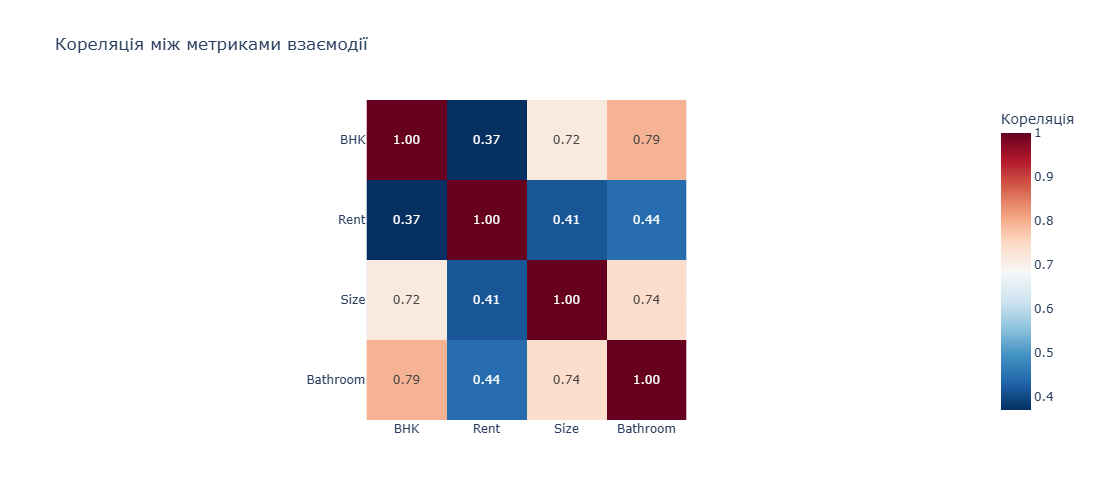

In [35]:
# 3.1.Аналіз кореляцій та взаємозв'язків 

# Створюємо датафрейм тільки з числовими метриками
metrics_df = df_clean[['BHK', 'Rent', 'Size', 'Bathroom']].dropna()

# Матриця кореляцій
correlation_matrix = metrics_df.corr()

#3.2. Візуалізація кореляцій
fig = px.imshow(
    correlation_matrix,
    text_auto='.2f',
    color_continuous_scale='RdBu_r',
    title='Кореляція між метриками взаємодії',
    labels=dict(color="Кореляція")
)
fig.update_layout(height=500)
fig.show()

**Висновки на основі аналізу кореляційної матриці:**

Між BHK (к-ть спалень, залів, кухонь) і Size (площа в квадратних футах) сильна позитивна залежність - 0,72. Що є логічним, чим більша площа тим відповідно і більше кімнат.

BHK (к-ть спалень, залів, кухонь)та Bathroom (к-ть ванних кімнат): кореляція 0.79. Що теж логічно, більше кімнат і більше ванн відповідно.

Дуже сильна позитивна залежність. Кількість ванних кімнат зростає разом з кількістю кімнат BHK.

Rent та Size/BHK/Bathroom: кореляції 0.41, 0.37, 0.44
Помірна позитивна залежність. Орендна плата зростає із збільшенням площі, кількості кімнат та ванних кімнат, але зв’язок не настільки сильний, як між внутрішніми характеристиками квартири (BHK, Size, Bathroom).

Основні метрики квартир сильно корелюють між собою. Rent (орендна плата - цільова змінна) залежить від цих х-тик, але є й інші фактори, які впливають на орендну плату, наприклад, район, місто, стан меблювання тощо.


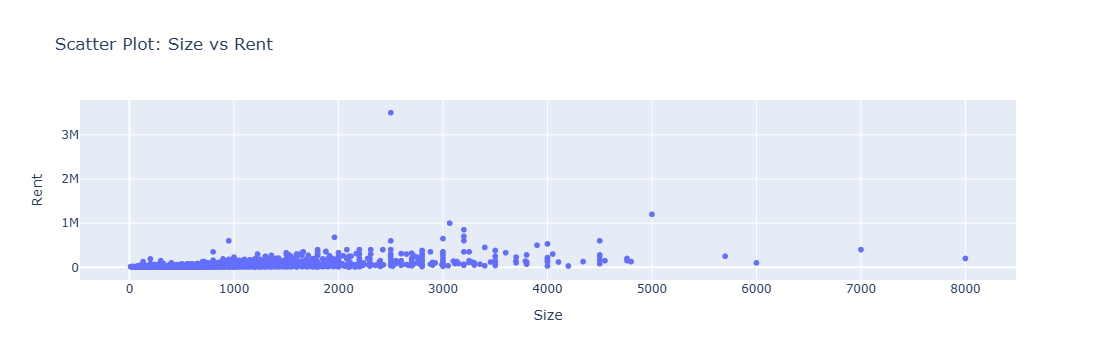

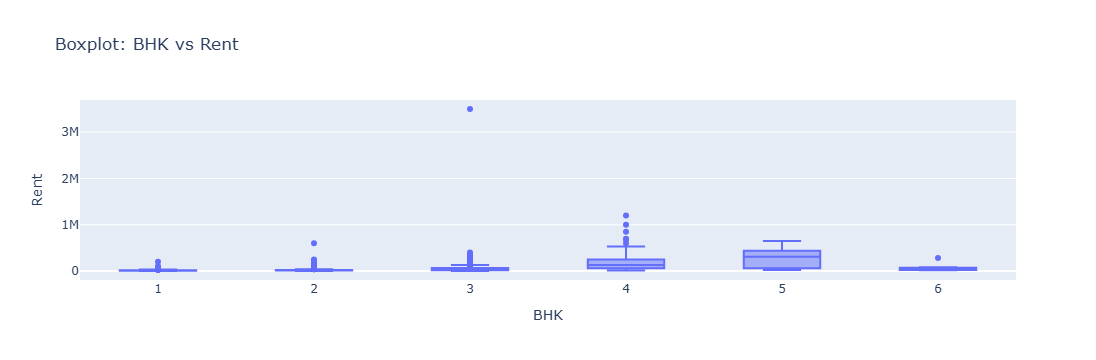

In [36]:
# 3.3. Scatter plot Size vs Rent
fig_scatter = px.scatter(df_clean, x='Size', y='Rent', title='Scatter Plot: Size vs Rent')
fig_scatter.show()

# 3.4. Boxplot BHK vs Rent
fig_box = px.box(df_clean, x='BHK', y='Rent', title='Boxplot: BHK vs Rent')
fig_box.show()

**Висновок по результатах аналізу Scatter Plot**:
Прослідковується позитивна залежність, зі збільшенням площі житла збільшується і орендна плата. Проте ця залежність не є лінійною та має розкид. Є викиди (точки із дуже великим значенням орендної плати), це виглядає як анамалія або ж елітна нерухомість. Таклож є точки, де розмір великий, понад 6000 кв. футів, але орендна плата маленька. Навіть для однакової площі значення оренди можуть сильно відрізнятись. Це значить, що на ціну впливає не тільки розмір, а й інші фактори.

**Висновок по результатах аналізу Boxplot**: BHK (Кількість спалень, залів, кухонь) vs Rent. Зі зростанням BHK зростає і медіанна орендна плата.
Це логічно: більші квартири/будинки (з більшою кількістю кімнат) зазвичай дорожчі в оренді.
Розкид даних (варіативність)
Для 1 та 2 BHK орендна плата зазвичай низька і більш стабільна.
Починаючи з 3–4 BHK, діапазон цін суттєво збільшується, що вказує на значний розкид у вартості оренди залежно від району, якості житла тощо.
Для 4–5 BHK видно широкий інтервал (boxplot високий), що підтверджує високу варіативність цін.
Викиди (outliers)
Для кожної категорії є значна кількість викидів: орендні плати, які значно перевищують звичайний діапазон (навіть >1 млн і аж до 3.5 млн).
Це, ймовірно, елітна або комерційна нерухомість, яка відрізняється від ринку масового сегмента.
Значна кількість викидів свідчить про наявність елітного житла, що сильно спотворює середні значення.

## Завдання 4: Feature Engineering та підготовка даних (4 бали)

**Що потрібно зробити:**
1. Закодуйте категоріальні змінні за допомогою One-Hot Encoding. Пригадайте, що в лекції ми говорили щодо кодування кат. змінних з великої кількістю різних значень і як працювати з такими випадками. Ви можете закодувати не всі кат. змінні, а лише ті, що вважаєте за потрібні (скажімо ті, що мають відносно небагато різних значень).
2. **Опціонально (по 0.5 бала за кожну доцільну ознаку):** Додайте нові ознаки, обчислені на основі наявних даних, які б на ваш погляд були корисними для моделі
3. Виберіть ознаки для побудови моделі (виключіть непотрібні колонки). Виключити можна, наприклад, ті колонки, які мають категоріальний тип і забагато (більше 20) різних значень. Треба виключити хоча б 1 колонку.
4. Розділіть дані на ознаки (X) та цільову змінну (y)
5. Застосуйте стандартизацію до числових ознак


In [43]:
!pip install scikit-learn

In [42]:
!pip install scikit-learn

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# 4.1. Виключаємо колонки з великою кількістю унікальних значень
# Наприклад, Area Locality має сотні районів, тому для лінійної регресії закодовувати її неефективно
df_model = df_no_outliers.drop(columns=['Area Locality', 'Point of Contact'])

# 4.2. Формуємо список числових і категоріальних змінних
numeric_features = ['BHK', 'Size', 'Bathroom']  
categorical_features = ['City', 'Furnishing Status', 'Tenant Preferred', 'Area Type']

# 4.3. Створюємо нові ознаки
df_model['Rent_per_sqft'] = df_model['Rent'] / df_model['Size']  # середня ціна за квадратний фут
df_model['BHK_per_bathroom'] = df_model['BHK'] / (df_model['Bathroom'] + 1)  # співвідношення спалень до ванн

# 4.4. Формуємо X та y
X = df_model.drop(columns=['Rent'])  
y = df_model['Rent']

# 4.5. Кодування категоріальних змінних (One-Hot Encoding) + стандартизація числових
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore', drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

# 4.6. Створюємо pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor)
])

# 4.7. Розділення на train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4.8. Трансформуємо дані (щоб перевірити розміри після кодування)
X_train_transformed = pipeline.fit_transform(X_train)
X_test_transformed = pipeline.transform(X_test)

print("Розмір після трансформації:", X_train_transformed.shape, X_test_transformed.shape)


Розмір після трансформації: (3380, 14) (846, 14)


## Завдання 5: Розділення даних та навчання моделі (3 бали)

**Що потрібно зробити:**
1. Розділіть дані на навчальну (80%) та тестову (20%) вибірки.
2. Створіть модель лінійної регресії.
3. Навчіть модель на навчальних даних.
4. Виведіть усі коефіцієнти моделі (ваги) та напишіть, які 2 ознаки найбільше впливають на прогноз.
5. Зробіть прогнози на тренувальній та тестовій вибірках.

In [51]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

#5.1. Створюємо модель лінійної регресії
model = LinearRegression()

# 5.2. Навчання на тренувальних даних
model.fit(X_train_transformed, y_train)

# 5.3. Отримання коефіцієнтів (ваг)
feature_names_num = numeric_features
feature_names_cat = pipeline.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out(categorical_features)
feature_names = np.concatenate([feature_names_num, feature_names_cat])

coefficients = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', key=abs, ascending=False)

print("Всі коефіцієнти моделі:")
print(coefficients)

# 5.4. Які 2 ознаки найбільше впливають
top2 = coefficients.head(2)
print("\n2 ознаки, що найбільше впливають на прогноз:")
print(top2)

# 5.5. Прогнози на train і test
y_train_pred = model.predict(X_train_transformed)
y_test_pred = model.predict(X_test_transformed)

Всі коефіцієнти моделі:
                              Feature   Coefficient
7                         City_Mumbai  22147.789560
9       Furnishing Status_Unfurnished  -4752.563963
1                                Size   4395.803252
13               Area Type_Super Area  -3510.351883
4                          City_Delhi   3483.486938
6                        City_Kolkata  -3455.815554
8    Furnishing Status_Semi-Furnished  -3339.052218
5                      City_Hyderabad  -2917.638160
11            Tenant Preferred_Family  -2683.845287
0                                 BHK   2342.155612
2                            Bathroom   2170.554120
3                        City_Chennai  -1620.827482
10  Tenant Preferred_Bachelors/Family  -1373.728000
12              Area Type_Carpet Area   -400.244236

2 ознаки, що найбільше впливають на прогноз:
                         Feature   Coefficient
7                    City_Mumbai  22147.789560
9  Furnishing Status_Unfurnished  -4752.563963


## Завдання 6: Оцінка якості моделі (2 бали)

**Що потрібно зробити:**
1. Обчисліть MAE, RMSE та R² для навчальної та тестової вибірок
2. Порівняйте метрики та зробіть висновок про якість моделі
3. Проаналізуйте і дайте висновок, чи є ознаки перенавчання або недонавчання (**Нагадування**: перенавчання - коли модель дуже добре працює на тренувальних даних, але погано на тестових; недонавчання - коли модель погано працює навіть на тренувальних даних)
4. Побудуйте графік розсіювання "реальні vs прогнозовані значення" та зробіть висновок про якість моделі


=== Метрики для навчальної вибірки ===
MAE: 5951.47
RMSE: 8238.36
R²: 0.644

=== Метрики для тестової вибірки ===
MAE: 5872.67
RMSE: 8173.13
R²: 0.652

Висновок: модель узагальнює дані адекватно, явних ознак перенавчання чи недонавчання немає.


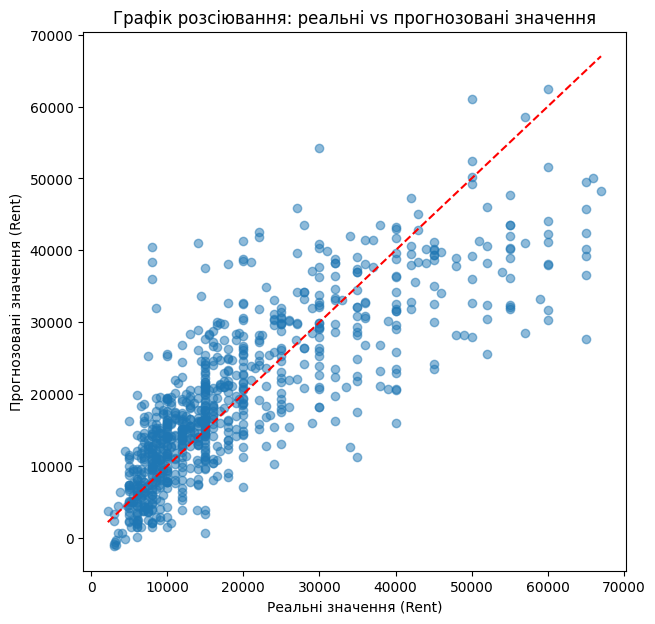

In [53]:
# Метрики для навчальної вибірки
mae_train = mean_absolute_error(y_train, y_train_pred)
rmse_train = np.sqrt(mean_squared_error(y_train, y_train_pred))
r2_train = r2_score(y_train, y_train_pred)

# Метрики для тестової вибірки
mae_test = mean_absolute_error(y_test, y_test_pred)
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

print("=== Метрики для навчальної вибірки ===")
print(f"MAE: {mae_train:.2f}")
print(f"RMSE: {rmse_train:.2f}")
print(f"R²: {r2_train:.3f}")

print("\n=== Метрики для тестової вибірки ===")
print(f"MAE: {mae_test:.2f}")
print(f"RMSE: {rmse_test:.2f}")
print(f"R²: {r2_test:.3f}")

# Порівняння
if r2_train > 0.8 and (r2_train - r2_test) > 0.2:
    print("\nВисновок: є ознаки ПЕРЕНАВЧАННЯ (модель добре працює на train, але гірше на test).")
elif r2_train < 0.5 and r2_test < 0.5:
    print("\nВисновок: є ознаки НЕДОНАВЧАННЯ (модель погано працює навіть на train).")
else:
    print("\nВисновок: модель узагальнює дані адекватно, явних ознак перенавчання чи недонавчання немає.")

# Побудова графіка "реальні vs прогнозовані значення"
plt.figure(figsize=(7,7))
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # ідеальна лінія
plt.xlabel("Реальні значення (Rent)")
plt.ylabel("Прогнозовані значення (Rent)")
plt.title("Графік розсіювання: реальні vs прогнозовані значення")
plt.show()


## Завдання 7: Аналіз помилок (4 бали)

**Що потрібно зробити:**
1. Обчисліть помилки (residuals = реальні - прогнозовані значення)
2. Побудуйте гістограму розподілу помилок
3. Створіть scatter plot помилок відносно величини прогнозованих значень. Чи росте помилка з ростом прогнозованого значення?
4. Знайдіть 5 прогнозів з найбільшими помилками
5. Проаналізуйте, на яких типах житла модель помиляється найбільше. Типи можна розрізняти за кількістю кімнат чи містом, наприклад.
6. Подумайте і напишіть, які наступні кроки ви б зробили, аби поліпшити якість моделі. Опціонально можна їх зробити і ми перевіримо :)

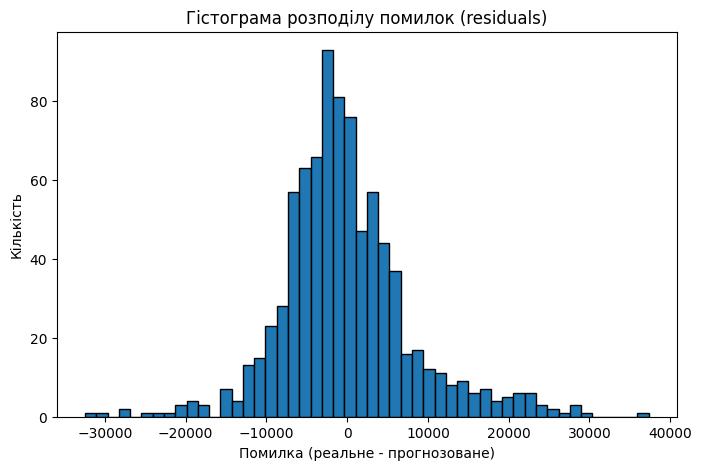

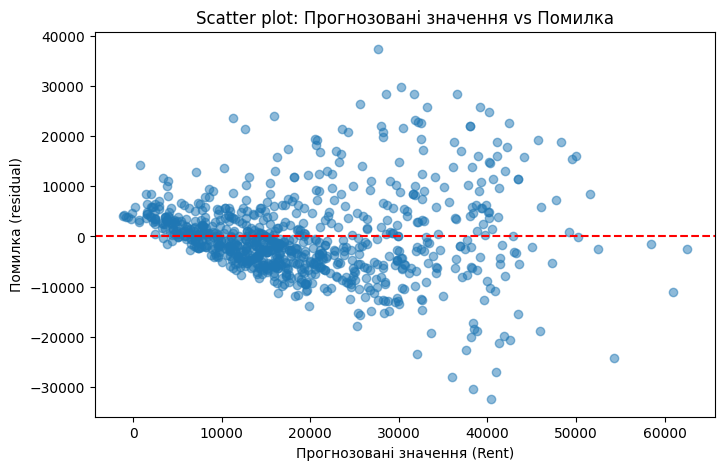

5 прогнозів з найбільшими помилками:
       Real     Predicted      Residual
3520  65000  27657.468321  37342.531679
852    8000  40458.542312 -32458.542312
549    8000  38371.128780 -30371.128780
809   60000  30254.406987  29745.593013
3962  65000  36515.934357  28484.065643

Деталі 5 найбільших помилок:
        City  BHK  Size  Bathroom   Real     Predicted      Residual
0  Bangalore    3  1500         2  65000  27657.468321  37342.531679
1    Chennai    1   350         1   8000  40458.542312 -32458.542312
2      Delhi    3  1800         3   8000  38371.128780 -30371.128780
3  Hyderabad    1   450         1  60000  30254.406987  29745.593013
4  Hyderabad    2  1100         2  65000  36515.934357  28484.065643

 Наступні кроки для покращення моделі:

1. Використати нелінійні моделі (Random Forest, Gradient Boosting, XGBoost), 
   оскільки лінійна регресія може не враховувати складні залежності.
2. Розширити feature engineering:
   - взаємодії між BHK, Bathroom, Size;
   - нормалізуват

In [56]:
# 1. Обчислюємо помилки (residuals)
residuals = y_test - y_test_pred

# 2. Гістограма розподілу помилок
plt.figure(figsize=(8,5))
plt.hist(residuals, bins=50, edgecolor='black')
plt.title("Гістограма розподілу помилок (residuals)")
plt.xlabel("Помилка (реальне - прогнозоване)")
plt.ylabel("Кількість")
plt.show()

# 3. Scatter plot: прогнозовані значення vs помилки
plt.figure(figsize=(8,5))
plt.scatter(y_test_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.title("Scatter plot: Прогнозовані значення vs Помилка")
plt.xlabel("Прогнозовані значення (Rent)")
plt.ylabel("Помилка (residual)")
plt.show()

# 4. Знаходимо 5 найбільших помилок
test_results = pd.DataFrame({
    'Real': y_test,
    'Predicted': y_test_pred,
    'Residual': residuals
})
top5_errors = test_results.reindex(residuals.abs().sort_values(ascending=False).index).head(5)

print("5 прогнозів з найбільшими помилками:")
print(top5_errors)

# 5. Додаємо інформацію про житло (BHK, City тощо) для аналізу

# Робимо reset_index для обох таблиць
X_test_reset = X_test.reset_index(drop=True)
top5_errors_reset = top5_errors.reset_index(drop=True)

# Об’єднуємо за позиціями
top5_full = pd.concat([X_test_reset.loc[top5_errors_reset.index], top5_errors_reset], axis=1)

print("\nДеталі 5 найбільших помилок:")
print(top5_full[['City','BHK','Size','Bathroom','Real','Predicted','Residual']])

# 6. Ідеї для покращення моделі
print("\n Наступні кроки для покращення моделі:")
print("""
1. Використати нелінійні моделі (Random Forest, Gradient Boosting, XGBoost), 
   оскільки лінійна регресія може не враховувати складні залежності.
2. Розширити feature engineering:
   - взаємодії між BHK, Bathroom, Size;
   - нормалізувати Rent за містом (вартість житла в Мумбаї ≠ в Ченнаї).
3. Використати log-трансформацію цільової змінної (Rent), 
   щоб зменшити вплив великих викидів.
4. Додати географічні координати або інформацію про престижність району.
5. Виділити окремі моделі для різних міст, якщо відмінності між ними дуже великі.
""")
